# Caso bidimensional


$$\dot{u} = \frac{\partial f}{\partial u}u + \frac{\partial f}{\partial v}v$$
$$\dot{v} = \frac{\partial g}{\partial u}u + \frac{\partial g}{\partial v}v$$

$$\begin{pmatrix} \dot{u} \\ \dot{v} \end{pmatrix} = \begin{pmatrix} \frac{\partial f}{\partial u} & \frac{\partial f}{\partial v} \\ \frac{\partial g}{\partial u} & \frac{\partial g}{\partial v} \end{pmatrix} \begin{pmatrix} u \\ v \end{pmatrix}$$

$$\mathbf{J}= \begin{pmatrix} \frac{\partial f}{\partial x} & \frac{\partial f}{\partial y} \\ \frac{\partial g}{\partial x} & \frac{\partial g}{\partial y} \end{pmatrix}$$

## Sistema lineal bidimensional

$$\dot{x} = ax + by$$
$$\dot{y} = cx + dy$$

$$\dot{\bar{x}} = \mathbf{J}\bar{x}$$

donde

$$\mathbf{J} = \begin{pmatrix} a & b \\ c & d \end{pmatrix}$$

$$f(x*)=0$$
### ¿Cuáles son los puntos fijos?
$$\bar{x}=0$$
### ¿Qué dimensión tiene el sistema de EDO?

## Ejemplo

$$\begin{pmatrix} \dot{x} \\ \dot{y} \end{pmatrix} = \begin{pmatrix} a & 0 \\ 0 & d \end{pmatrix} \begin{pmatrix} x \\ y \end{pmatrix}$$

Cuyas soluciones analíticas son:

$$x(t) = x_0e^{at}$$
$$y(t) = y_0e^{dt}$$

Si $d = -1$, entonces

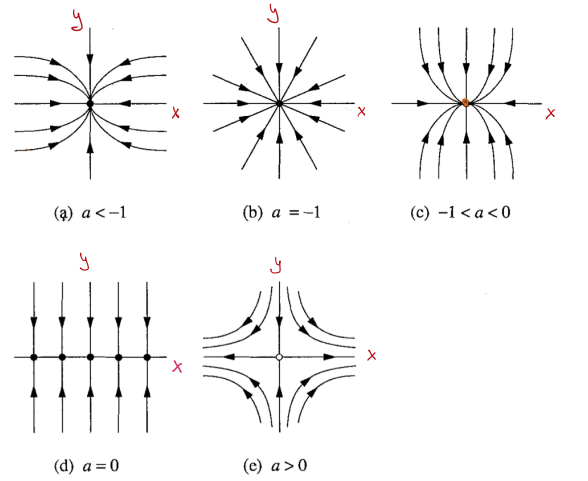

# Autovalores y autovectores

$$\mathbf{J}\bar{x} = \begin{pmatrix} a & b \\ c & d \end{pmatrix} \bar{x} = \lambda \bar{x}$$

Para obtener la ecuación característica:

$$\left(\mathbf{J} - \lambda\mathbf{1}\right) \bar{x} = \bar{0}$$

donde

$$\mathbf{1} = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} $$

Por tanto, 

$$det\left(\mathbf{J} - \lambda\mathbf{1}\right) = 0$$

Desarrollando,

$$det\left(\mathbf{J} - \lambda\mathbf{1}\right) = (a-\lambda)(d-\lambda)-cb = \lambda^2 - \lambda\tau +\Delta = 0$$

Con $\tau = a + d$ la traza de $\mathbf{J}$ y $\Delta = ad-bc$ el determinante de $\mathbf{J}$.

Las soluciones de los autovalores son:

$$\lambda_{1,2} = \frac{\tau \pm \sqrt{\tau^2-4\Delta}}{2}$$

Estos valores pueden ser: 

1. Reales, $\lambda_1 = \lambda_2$
2. Reales, $\lambda_1 \neq \lambda_2$
3. Complejos, $\lambda_1 = \bar{\lambda_2}$

# Vectores propios

Si el problema es lineal, la suma de soluciones es lineal.



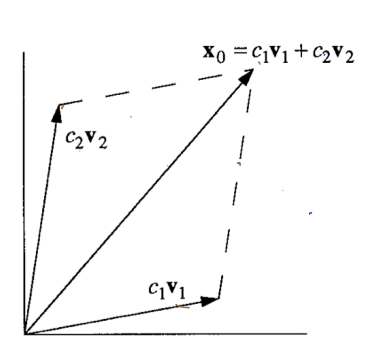

## Caso Real (1 y 2)

$$\bar{x}(t) = \begin{pmatrix} x(t) \\ y(t) \end{pmatrix} = A_1 e^{\lambda_1t} \begin{pmatrix} v_x^1 \\ v_y^1 \end{pmatrix}+A_2 e^{\lambda_2t} \begin{pmatrix} v_x^2 \\ v_y^2 \end{pmatrix}$$

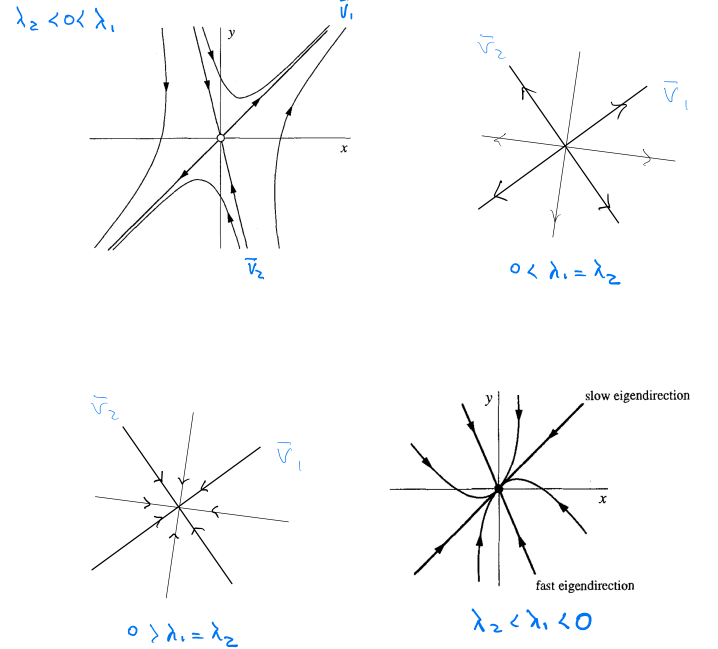

# Caso complejo (3)


Si $\lambda_{1,2} = \alpha \pm i\omega$
$$\bar{x}(t) = \begin{pmatrix} x(t) \\ y(t) \end{pmatrix} = e^{\alpha t} \left(A_1 e^{i\omega t} \bar{v_1}+ A_2 e^{-i\omega t} \bar{v_2}\right)$$

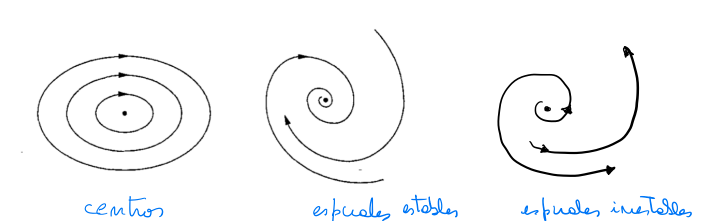

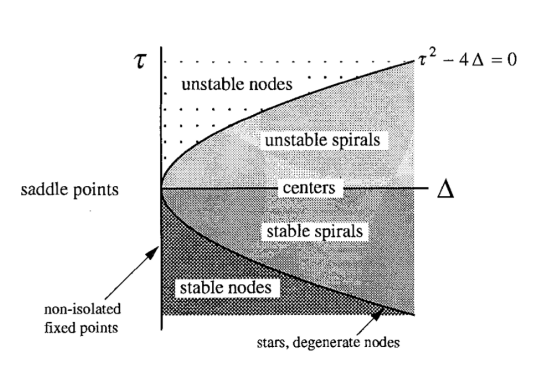

# Ejemplo práctico: Logística

https://es.wikipedia.org/wiki/M%C3%A9todo_de_Runge-Kutta

In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
def euler(f,x,t,dt,p):
    """
    Calcula un paso de integración por método de Euler
    Args de entrada
    f: R^n -> R^n
    x: x(t) R^n
    t: tiempo R
    dt: paso de tiempo R
    p: parametros R^q
    
    Devuelve aprox numérica de x(t+dt)
    """
    return x+dt*f(x,t,p)

In [9]:
def rk4(f,x,t,dt,p):
    """
    Calcula un paso de integración por método de Runge Kutta 4
    Args de entrada
    f: R^n -> R^n
    x: x(t) R^n
    t: tiempo R
    dt: paso de tiempo R
    p: parametros R^q
    
    Devuelve aprox numérica de x(t+dt)
    """
    k1 = f(x,t,p)
    k2 = f(x+0.5*dt*k1,t+0.5*t,p)
    k3 = f(x+0.5*dt*k2,t+0.5*t,p)
    k4 = f(x+dt*k3,t+dt,p)
    return x+dt*(k1+2.0*k2+2.0*k3+k4)/6.0

In [10]:
def i_ode(m,f,x0,a,b,k,p):
    """
    Integra la ODE
    dx/dt = f(x,t)
    sobre t = [a,b], usando k pasos de integración y el método m, con la condición inicial x(a)=x0
    """
    assert k>0
    n = len(x0)
    dt = (b-a)/k
    x = np.zeros((n,k+1))
    t = np.zeros(k+1)
    x[:,0] = x0
    t[0] = a
    for j in range(k):
        t[j+1] = t[j] + dt
        x[:,j+1] = m(f,x[:,j],t[j],dt,p)
    return t,x

Tomando 
$$\dot{x} = -ax+b$$
con $a,b>0$
1. Encuentre puntos fijos
2. Determine la estabilidad
3. Calcule las trayectorias para x(0)=1 usando k = 50 pasos de integración en $t\in [0,5]$ para $a=2$ y $b=3$.
4. Grafique x(t). Compare con la solución exacta:
$$x(t) = \left(x_0+\frac{b}{a}\right)e^{-at}-\frac{b}{a}$$

## Rta 1

Si $$0 = -ax*+b$$

Entonces
$$x* = \frac{b}{a}$$

## Rta 2

De la teoría de perturbaciones,

$$\dot{\eta} = f'(x*)\eta = -a\eta$$

entonces

$$\eta = C e^{-at}$$

Y este punto es atractivo.

In [11]:
def f(x,t,p):
    """
    Devuelve
    -a*x+b
    """
    return -p[0]*x[0]+p[1]

In [15]:
m = euler
#m = rk4
a = 2
b = 3
p = np.array([a,b])
x0 = np.array([1,0])
ti = 0.0
tf = 5.0
k = 50
t,x = i_ode(m,f,x0,ti,tf,k,p)

In [16]:
def x_exacta(t,x0,p):
    return (x0[0]-p[1]/p[0])*np.exp(-p[0]*t)+p[1]/p[0]

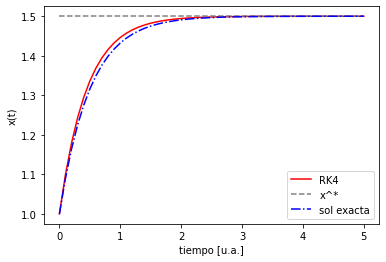

In [17]:
plt.xlabel('tiempo [u.a.]')
plt.ylabel('x(t)')
plt.plot(t,x[0,:],label='RK4',color = 'red', linestyle = '-')
x_fix = b/a
plt.plot(t,x_fix*np.ones(len(t)), label='x^*', color = 'gray', linestyle = '--')
plt.plot(t,[x_exacta(_t,x0,p) for _t in t], label='sol exacta', color = 'blue', linestyle = '-.')
plt.legend()
plt.show()